In [5]:
!python -V

Python 3.13.5


C:\Users\limzi\AppData\Local\Temp\ipykernel_13000\3375639168.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-09-01")
[*********************100%***********************]  1 of 1 completed


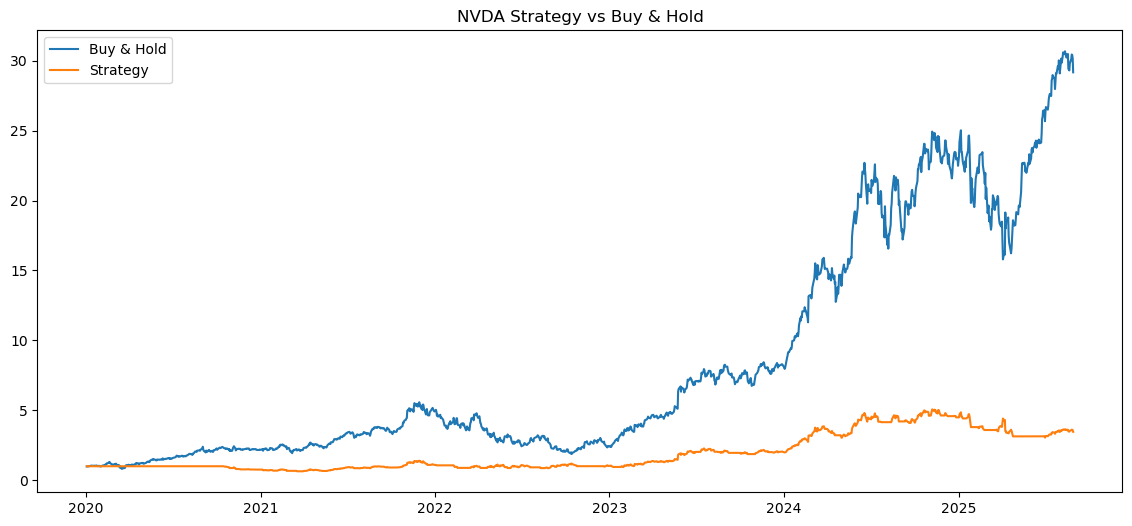

Price            Close       SMA50      SMA200        RSI Signal
Ticker            NVDA                                          
Date                                                            
2025-08-18  182.009995  164.338606  137.065091  64.678369      1
2025-08-19  175.639999  165.017202  137.237203  51.665981      1
2025-08-20  175.399994  165.672800  137.417664  51.247632      1
2025-08-21  174.979996  166.293400  137.628916  50.477365      1
2025-08-22  177.990005  166.996600  137.842022  55.625036      1
2025-08-25  179.809998  167.692800  138.060979  58.438155      1
2025-08-26  181.770004  168.488800  138.270440  61.284624      1
2025-08-27  181.600006  169.227000  138.450558  60.895072      1
2025-08-28  180.169998  169.948000  138.607179  57.579487      1
2025-08-29  174.179993  170.522000  138.740099  46.225820      0
🤝 No trade signal today.


In [1]:
!pip install yfinance pandas matplotlib ta alpaca-py --quiet

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta

from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce

# ================================
# 1. Alpaca Setup
# ================================
API_KEY = "PKOZ2SP2YQCTRHE8XOQZ"
API_SECRET = "b1YhQTX9QtcSJO7BAYR9Ld3ku9WoLradIolgm1iv"

trading_client = TradingClient(API_KEY, API_SECRET, paper=True)

# ================================
# 2. Download Data & Indicators
# ================================
ticker = "NVDA"
data = yf.download(ticker, start="2020-01-01", end="2025-09-01")
data.dropna(inplace=True)

data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

close_series = data['Close'].squeeze()
data['RSI'] = ta.momentum.RSIIndicator(close=close_series, window=14).rsi()

# ================================
# 3. Strategy Logic
# ================================
data['Signal'] = 0
data.loc[(data['SMA50'] > data['SMA200']) & (data['RSI'] > 50), 'Signal'] = 1   # Buy
data.loc[(data['SMA50'] < data['SMA200']) & (data['RSI'] < 50), 'Signal'] = -1  # Sell

# ================================
# 4. Backtest
# ================================
data['Daily_Return'] = data['Close'].pct_change()
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']
cumulative = (1 + data[['Daily_Return', 'Strategy_Return']]).cumprod()

plt.figure(figsize=(14, 6))
plt.plot(cumulative['Daily_Return'], label="Buy & Hold")
plt.plot(cumulative['Strategy_Return'], label="Strategy")
plt.title(f"{ticker} Strategy vs Buy & Hold")
plt.legend()
plt.show()

print(data[['Close', 'SMA50', 'SMA200', 'RSI', 'Signal']].tail(10))

# ================================
# 5. Send Last Signal to Alpaca
# ================================
latest_signal = data['Signal'].iloc[-1]

if latest_signal == 1:
    print("📈 Buy signal detected, sending order...")
    order_request = MarketOrderRequest(
        symbol=ticker,
        qty=100,
        side=OrderSide.BUY,
        time_in_force=TimeInForce.DAY
    )
    trading_client.submit_order(order_request)

elif latest_signal == -1:
    print("📉 Sell signal detected, sending order...")
    order_request = MarketOrderRequest(
        symbol=ticker,
        qty=100,
        side=OrderSide.SELL,
        time_in_force=TimeInForce.DAY
    )
    trading_client.submit_order(order_request)
else:
    print("🤝 No trade signal today.")


SyntaxError: invalid syntax (335041238.py, line 1)

In [7]:
pip install --upgrade jupyterlab-git

Note: you may need to restart the kernel to use updated packages.


In [8]:
jupyter server extension list

SyntaxError: invalid syntax (2045445874.py, line 1)